In [4]:
import pandas as pd
from pathlib import Path

# Loading the train.csv

In [5]:
TRAIN_CSV = Path('Artifacts/train.csv')

In [6]:
sales_df = pd.read_csv(TRAIN_CSV)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Getting More Information about train.csv

In [12]:
sales_df.shape

(8523, 12)

In [11]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Checking for Nan values

In [9]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [97]:
sales_df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# Imputing the missing values for "Outlet_Size"

In [158]:
import matplotlib.pyplot as plt

In [21]:
print("Outlet_Size : ",sales_df["Outlet_Size"].dtype)

Item_Weight :  float64
Outlet_Size :  object


In [39]:
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [40]:
sales_df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [90]:
without_Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False]
without_Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [87]:
Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull()]
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [91]:
 random_sampled_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False].sample(2410).Outlet_Size.values
 random_sampled_Outlet_size

array(['Small', 'High', 'Medium', ..., 'High', 'Medium', 'Small'],
      dtype=object)

In [93]:
Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size
Nan_Outlet_size.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_6268\1714010487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344


In [94]:
imputed_outlet_size = pd.concat([without_Nan_Outlet_size,Nan_Outlet_size])
imputed_outlet_size.shape

(8523, 12)

In [95]:
imputed_outlet_size.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

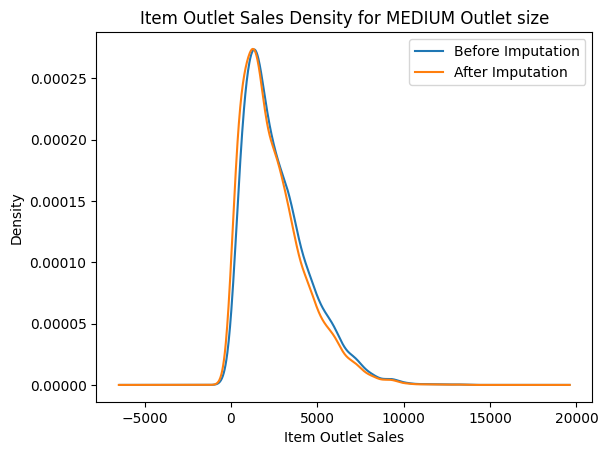

In [157]:
sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for MEDIUM Outlet size")
plt.legend()

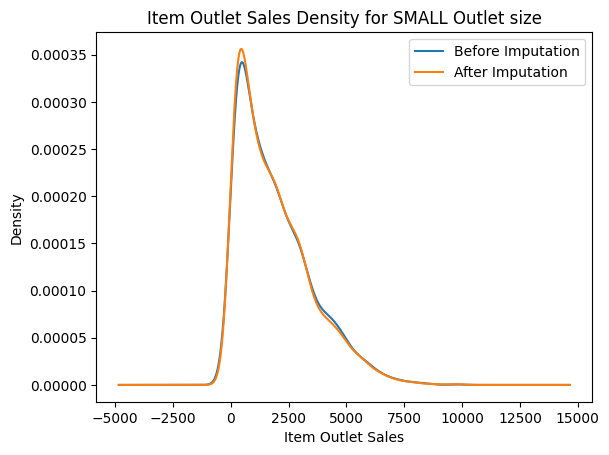

In [156]:
sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for SMALL Outlet size")
plt.legend()

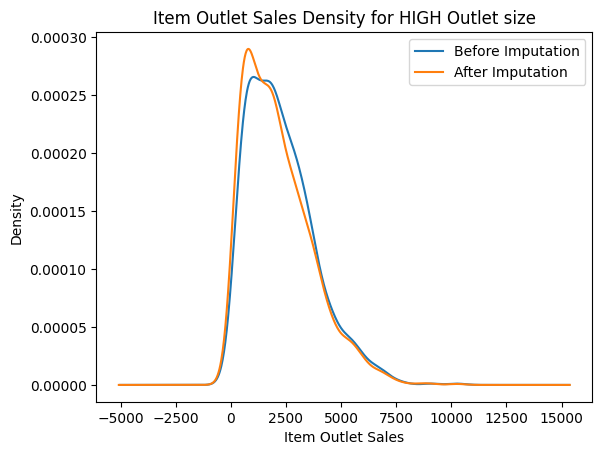

In [155]:
sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for HIGH Outlet size")
plt.legend()

In [139]:
without_Nan_Outlet_size.select_dtypes(exclude='object').corr().iloc[-1][:4]

Item_Weight                  0.010972
Item_Visibility             -0.105854
Item_MRP                     0.588939
Outlet_Establishment_Year   -0.057850
Name: Item_Outlet_Sales, dtype: float64

In [136]:
imputed_outlet_size.select_dtypes(exclude='object').corr().iloc[-1][:4]

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Name: Item_Outlet_Sales, dtype: float64

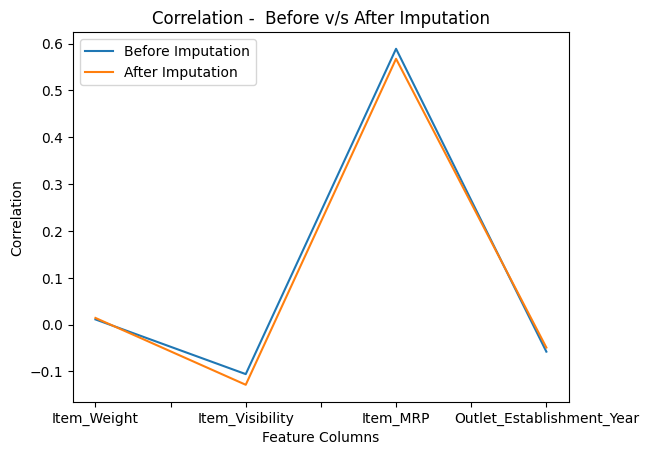

In [152]:
without_Nan_Outlet_size.select_dtypes(exclude='object').corr().iloc[-1][:4].plot(label='Before Imputation')
imputed_outlet_size.select_dtypes(exclude='object').corr().iloc[-1][:4].plot( label='After Imputation')
plt.xlabel("Feature Columns")
plt.ylabel("Correlation")
plt.title("Correlation -  Before v/s After Imputation")
plt.legend()

# Filling Nan for "Item_weight"

In [140]:
print("Item_Weight : ",sales_df["Item_Weight"].dtype)

Item_Weight :  float64


## Detecting outliers

Text(0, 0.5, 'Item weight')

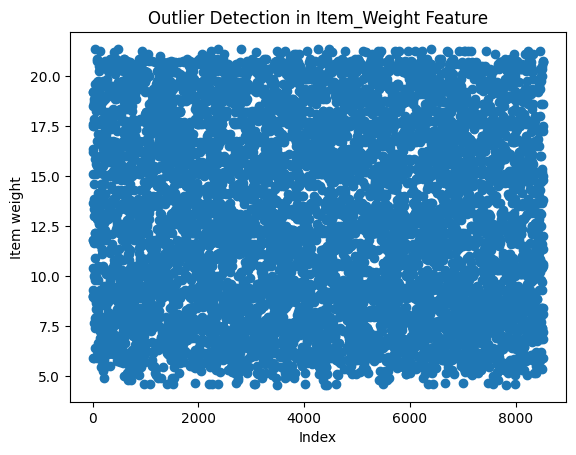

In [159]:
plt.scatter(sales_df.index,sales_df["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.xlabel("Index")
plt.ylabel("Item weight")

## ` Data is uniformily spreaded out That's why there is no Outlier detected in "Item_weight" feature`